In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:>

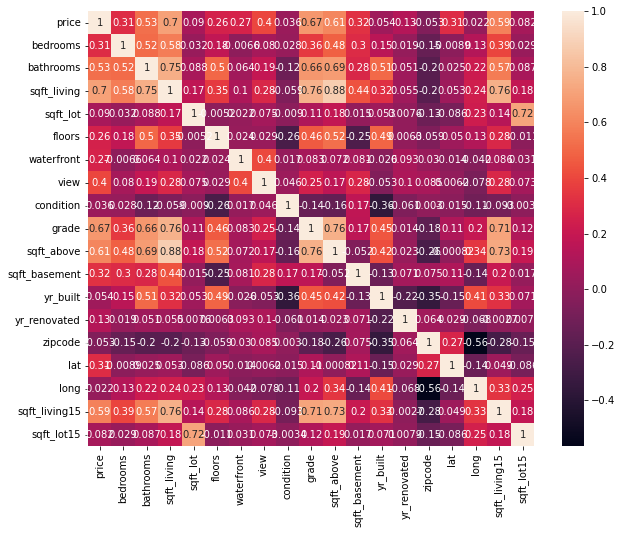

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns=['id','date']).corr(),annot=True)

In [6]:
X = data.drop(columns=['id','date','price'])
y = data['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresi Linear tanpa Polynomial features

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 124963.29764998758
MSE: 39314708523.902954
RMSE: 198279.36988981723
MAPE: 0.25518621468743335
R2 Score: 0.699080553595266
==================== TEST ====================
MAE: 127391.16343048852
MSE: 45161858107.74477
RMSE: 212513.19513796023
MAPE: 0.24924023803185683
R2 Score: 0.7012644511608866


### Dengan Polynomial Features

In [10]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly,y_train)

y_pred_train = model.predict(X_train_poly)
y_pred = model.predict(X_test_poly)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 96971.5222744361
MSE: 21688616921.320007
RMSE: 147270.55687176582
MAPE: 0.20037472486047608
R2 Score: 0.8339927512554265
==================== TEST ====================
MAE: 104149.09093800602
MSE: 30330954488.465233
RMSE: 174157.84360305232
MAPE: 0.2050250864810556
R2 Score: 0.799367547847373


### Model Linear dengan Regularisasi L1 (Lasso)

In [11]:
model = Lasso(alpha=0.1,fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 125033.15869131533
MSE: 39311882352.65646
RMSE: 198272.24302119666
MAPE: 0.2554049361134009
R2 Score: 0.6991021854455041
==================== TEST ====================
MAE: 127493.34127389427
MSE: 45173050018.28453
RMSE: 212539.52577881727
MAPE: 0.24954317140281126
R2 Score: 0.7011904191861685


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20585273464920.125, tolerance: 225891453177.8125
  model = cd_fast.enet_coordinate_descent(


### Model Linear dengan Ridge (L2)

In [12]:
model = Ridge(alpha=0.1,fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 125032.94760557853
MSE: 39311882354.39526
RMSE: 198272.24302558153
MAPE: 0.2554042590948219
R2 Score: 0.699102185432195
==================== TEST ====================
MAE: 127493.14790834185
MSE: 45173072024.319695
RMSE: 212539.57754808795
MAPE: 0.24954258057917608
R2 Score: 0.7011902736211881


# Model Linear dengan ElasticNet

In [13]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5, fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 123618.58546009967
MSE: 39438373818.36828
RMSE: 198590.97114010062
MAPE: 0.2502445550611277
R2 Score: 0.6981340047501345
==================== TEST ====================
MAE: 126285.80701429067
MSE: 45513632130.62795
RMSE: 213339.24189100316
MAPE: 0.24509570009256895
R2 Score: 0.698937545001653


### Ridge + Poly features

In [14]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Ridge(alpha=0.5,fit_intercept=True)
model.fit(X_train_poly,y_train)

y_pred_train = model.predict(X_train_poly)
y_pred = model.predict(X_test_poly)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 96998.27855372717
MSE: 21688780861.181946
RMSE: 147271.11346486773
MAPE: 0.2007380042645718
R2 Score: 0.8339914964402606
==================== TEST ====================
MAE: 104203.31454512422
MSE: 30445054111.075108
RMSE: 174485.11143096167
MAPE: 0.20533091567076803
R2 Score: 0.7986128044685382


# Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
X=data.drop(columns=['id','date','waterfront'])
y=data['waterfront']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LogisticRegression(penalty='l2',solver='newton-cg',C=0.1, fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train= model.predict(X_train_scaled)
y_pred_test=  model.predict(X_test_scaled)

print('train Accuracy:', accuracy_score(y_train, y_pred_train))
print('test Accuracy:', accuracy_score(y_test, y_pred_test))

train Accuracy: 0.9956622325043377
test Accuracy: 0.9944482997918113


ga overfit tapi data inbalance

In [19]:
y.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64